# Introduction to Deep Learning

### Contents
1. Video: But what is a neural network?
2. Getting to know some of the libraries: numpy, keras, tensorflow
3. Check your hardware
4. Visualising gradient loss
5. Under the hood of a neural network (to do)

## 1. Video: 'But what is a neural network?'

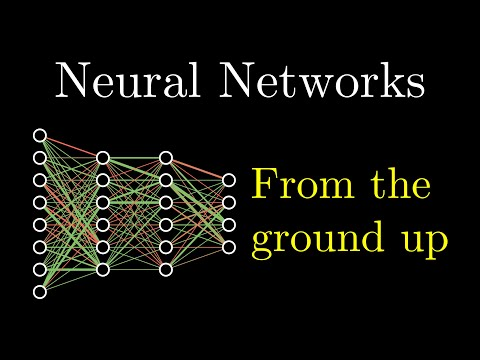

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('aircAruvnKk')

## 2. Getting to know some of the libraries: numpy, keras and tensorflow

Numpy is a widely used library for Numerical Python. It is mostly used for maths.

Keras is a library for deep learning. It is a 'high level' library that is used to create deep learning models. Every layer in a deep learning model is available in Keras. 

Tensorflow is library developed by Google that is used for 'low level' deep learning. 

Between these libraries there is overlap.

In [2]:
!pip install numpy
!pip install keras
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.8 MB/s eta 0:00:00:00:0100:01
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 8.0 MB/s eta 0:00:0000:01
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0


In [3]:
print(dir(keras))

['Input', 'Model', 'Sequential', '__builtins__', '__cached__', '__doc__', '__file__', '__internal__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_sys', 'activations', 'applications', 'backend', 'callbacks', 'constraints', 'datasets', 'dtensor', 'estimator', 'experimental', 'initializers', 'layers', 'losses', 'metrics', 'mixed_precision', 'models', 'optimizers', 'preprocessing', 'regularizers', 'utils', 'wrappers']


In [6]:
print(dir(keras.layers))

['AbstractRNNCell', 'Activation', 'ActivityRegularization', 'Add', 'AdditiveAttention', 'AlphaDropout', 'Attention', 'Average', 'AveragePooling1D', 'AveragePooling2D', 'AveragePooling3D', 'AvgPool1D', 'AvgPool2D', 'AvgPool3D', 'BatchNormalization', 'Bidirectional', 'CategoryEncoding', 'CenterCrop', 'Concatenate', 'Conv1D', 'Conv1DTranspose', 'Conv2D', 'Conv2DTranspose', 'Conv3D', 'Conv3DTranspose', 'ConvLSTM1D', 'ConvLSTM2D', 'ConvLSTM3D', 'Convolution1D', 'Convolution1DTranspose', 'Convolution2D', 'Convolution2DTranspose', 'Convolution3D', 'Convolution3DTranspose', 'Cropping1D', 'Cropping2D', 'Cropping3D', 'Dense', 'DenseFeatures', 'DepthwiseConv1D', 'DepthwiseConv2D', 'Discretization', 'Dot', 'Dropout', 'ELU', 'EinsumDense', 'Embedding', 'Flatten', 'GRU', 'GRUCell', 'GaussianDropout', 'GaussianNoise', 'GlobalAveragePooling1D', 'GlobalAveragePooling2D', 'GlobalAveragePooling3D', 'GlobalAvgPool1D', 'GlobalAvgPool2D', 'GlobalAvgPool3D', 'GlobalMaxPool1D', 'GlobalMaxPool2D', 'GlobalMaxPo

In [8]:
help(keras.layers.Softmax)

Help on class Softmax in module keras.layers.activation.softmax:

class Softmax(keras.engine.base_layer.Layer)
 |  Softmax(axis=-1, **kwargs)
 |  
 |  Softmax activation function.
 |  
 |  Example without mask:
 |  
 |  >>> inp = np.asarray([1., 2., 1.])
 |  >>> layer = tf.keras.layers.Softmax()
 |  >>> layer(inp).numpy()
 |  array([0.21194157, 0.5761169 , 0.21194157], dtype=float32)
 |  >>> mask = np.asarray([True, False, True], dtype=bool)
 |  >>> layer(inp, mask).numpy()
 |  array([0.5, 0. , 0.5], dtype=float32)
 |  
 |  Input shape:
 |    Arbitrary. Use the keyword argument `input_shape`
 |    (tuple of integers, does not include the samples axis)
 |    when using this layer as the first layer in a model.
 |  
 |  Output shape:
 |    Same shape as the input.
 |  
 |  Args:
 |    axis: Integer, or list of Integers, axis along which the softmax
 |      normalization is applied.
 |  Call arguments:
 |    inputs: The inputs, or logits to the softmax layer.
 |    mask: A boolean mask of

## 3. Check your hardware

Deep Learning can take large amounts of memory. With the script below you can check your hardware.

If you have an old computer with limited hardware, you can always use online tools, such as Google Colab.

In [4]:
import tensorflow as tf
from tensorflow import keras
import sys

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print('CUDA available: ', tf.test.is_built_with_cuda())
print('tensorflow version: ', tf.version.VERSION)
print('Python version: ', sys.version)

Num GPUs Available:  0
CUDA available:  False
tensorflow version:  2.13.0
Python version:  3.10.9 (main, Mar  1 2023, 12:33:47) [Clang 14.0.6 ]


## 4. Visualising gradient loss 

MovieWriter imagemagick unavailable; using Pillow instead.


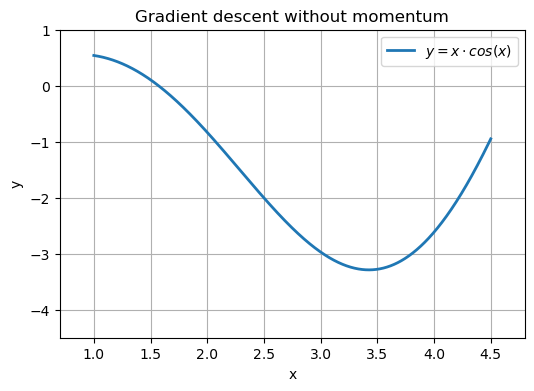

In [19]:
%matplotlib inline
#source: https://fosstodon.org/@bert_hubert/109892438697404275
#source: https://github.com/berthubert/hello-dl/blob/main/hello-dl.ipynb
import matplotlib.pyplot as plt
import numpy as np
import math
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter 
import matplotlib.animation as animation
# set parameters
frames = range(0, 20)

# set how the graph will change each frame

# init the figure
fig, ax = plt.subplots(figsize=(6,4))

x = np.linspace(1, 4.5, 1000)
y = x*np.cos(x) 
def dydx(x):
    return -math.sin(x)*x + math.cos(x)


def update(i):
    # clear the axis each frame
    ax.clear()
    ax.set_xlim(0.7,4.8)
    ax.set_ylim(-4.5,1)
    ax.grid()
    # replot things
    ax.plot(x, y, lw=2,label = "$ y = x\cdot{}cos(x)$")

    lex=1.0
    for c in range(0,i): 
        ax.arrow(lex, lex*math.cos(lex) , -0.2 * dydx(lex), -0.2*dydx(lex)*dydx(lex), width=0.025, color='black',
                 length_includes_head=True)
        lex = lex -0.2*dydx(lex)

    ax.legend()
    ax.set_title("Gradient descent without momentum")          
    # reformat things
    ax.set_xlabel('x')
    ax.set_ylabel('y')

ani = animation.FuncAnimation(fig, update, frames=frames, interval=500)
ani.save('sgd.gif', writer='imagemagick', fps=3)

In [20]:
dydx(5)

5.078283558778919

In [21]:
import glob
my_gifs = glob.glob('*.gif')
my_gifs

['sgd.gif']

In [18]:
from IPython.display import Image
Image(url='sgd.gif')  

## x. Under the hood